<a href="https://colab.research.google.com/github/leesochang/Deeplearning2020/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0_hello_MNIST_Keras_20142224_%EC%9D%B4%EC%86%8C%EC%B0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [48]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
Y_train.shape

(60000,)

In [51]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [52]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [53]:
input_size = 784
batch_size = 100
hidden_neurons = 400
epochs = 30 #이걸 더 늘려도 됨 근데 이거는 20번만에 0.9999퍼임

In [54]:
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

In [55]:
model = Sequential()
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
activation_9 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                4010      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


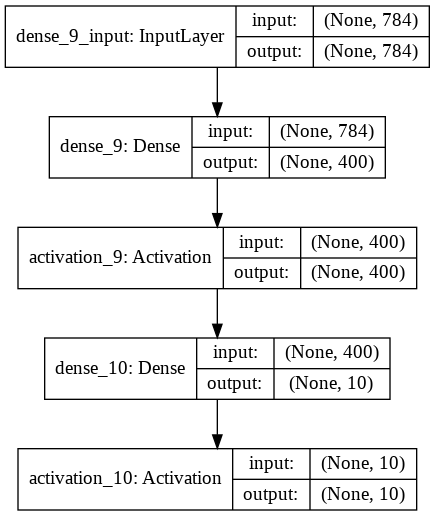

In [57]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True) #784개를 넣어서 10개를 뽑는 과정

In [58]:
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adadelta')

In [59]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.2822 - accuracy: 0.9198
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1217 - accuracy: 0.9642
Epoch 3/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0838 - accuracy: 0.9761
Epoch 4/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0631 - accuracy: 0.9817
Epoch 5/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0497 - accuracy: 0.9857
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0401 - accuracy: 0.9888
Epoch 7/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0330 - accuracy: 0.9912
Epoch 8/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0269 - accuracy: 0.9927
Epoch 9/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0219 - accuracy: 0.9949
Epoch 10/30
60000/60000 [==============================

In [60]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print('\n''Test accuracy:', score[1])

10000/10000 [==============================] - 0s 39us/step

Test accuracy: 0.9829000234603882
